# Kryptografia klasyczna (od starożytności do czasów współczesnych)
### Literatura:
1. Księga szyfrów, Simon Singh, Świat książki, 2001
2. Łamacze kodów, David Kahn, WNT, 2004

## Szyfr Cezara
--------------
Szyfr Cezara oczywiście nie zawdzięcza swego istnienia Juliuszowi Cezarowi. Został przezeń jedynie wspomniany w pamiętnikach o wojnach galijskich. Prawdopodobnie była to dobrze znana metoda w tym czasie.

In [4]:
# alfabet jawny i szyfrowy 
alphabets = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# zachowujemy długość alfabetu w zmiennej dla wygody
alphabet_size = len(alphabets)

# tekst, który będziemy szyfrować
plaintext = "Zorro fly zealotry zipper"

# zmienna, do której zapiszemy zaszyfrowany tekst
ciphertext = ""

#przesunięcie permutacji, czyli klucz szyfrowania
key = 15 

# wypisujemy tekst jawny
print("Tekst jawny: ", plaintext)

# rozdzielamy string plaintext na tablicę słów (pozbywamy się spacji) i na każdym słowie wykonujemy:
for word in plaintext.lower().split():
    # na każdej literze w słowie:
    for char in word:
        # do ciphertext dopisujemy litere odpowiadającą naszej przesuniętej o klucz
        ciphertext = ciphertext + alphabets[(alphabets.index(char) + key) % alphabet_size]
    
# wypisujemy zaszyfrowany tekst
print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

# zmienna, do której zapiszemy zdeszyfrowany tekst
decodedtext = ""

# na każdej literze w cyphertext:
for char in ciphertext:
    # do decodedtext dopisujemy litere odpowiadającą naszej
    # zaszyfrowanej literze przesuniętej o klucz w drugą stronę
    decodedtext = decodedtext + alphabets[(alphabets.index(char)- key) % alphabet_size]

# wypisujemy zdeszyfrowany tekst
print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  odggduanotpadignoxeetg (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Szyfr monoalfabetyczny: 
_danemu symbolowi alfabetu jawnego odpowiada dokładnie jeden i ten sam symbol alfabetu tajnego._

### Zastanów się:
1. Czy szyfr Cezara jest łatwy do złamania? Ile prób (testów przesunięć) trzeba aby złamać szyfr Cezara?
2. Co to jest atak siłowy (__brute force__)?  
3. Zaproponuj i zaimplementuj wariant szyfru Cezara, która wymaga wykonania większej liczby prób podczas ataku?  
4. Oceń koszt ataku na ten wariant Cezara.

In [9]:
# lepszy szyfr cezara (permutacyjny)

# importujemy bibliotekę numpy as np
import numpy as np

# tekst, który będziemy szyfrować
plaintext = "Zorro fly zealotry zipper"

# alfabet jawny
jawny = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
            'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# tworzymy permutacje alfabetu jawnego - nasz alfabet szyfrowy, tym samym klucz
tajny = np.random.permutation(jawny).tolist()

# zmienna, do której zapiszemy zaszyfrowany tekst
ciphertext = ""

# wypisujemy tekst jawny
print("Tekst jawny: ", plaintext)

# rozdzielamy string plaintext na tablicę słów (pozbywamy się spacji) i na każdym słowie wykonujemy:
for word in plaintext.lower().split():
    # na każdej literze w słowie:
    for char in word:
        # do ciphertext dopisujemy litere odpowiadającą naszej przesuniętej o klucz
        ciphertext = ciphertext + tajny[jawny.index(char) % len(jawny)]

# wypisujemy zaszyfrowany tekst
print("Szyfrogram: ",  ciphertext, "(spacje usunięte)")

# zmienna, do której zapiszemy zdeszyfrowany tekst
decodedtext = ""

# na każdej literze w cyphertext:
for char in ciphertext:
    # do decodedtext dopisujemy litere odpowiadającą naszej
    # zaszyfrowanej literze przesuniętej o klucz w drugą stronę
    decodedtext = decodedtext + jawny[tajny.index(char) % len(jawny)]
    
# wypisujemy zdeszyfrowany tekst
print("Odszyfrowana wiadomość: ",  decodedtext,  "(spacje usunięte)")

Tekst jawny:  Zorro fly zealotry zipper
Szyfrogram:  cdzzdmolcwuodbzlcxeewz (spacje usunięte)
Odszyfrowana wiadomość:  zorroflyzealotryzipper (spacje usunięte)


## Kryptoanaliza szyfrów monoalfabetycznych

Współcześnie kryptoanaliza szyfru Cezara jest trywialna. Można po prostu sprawdzić wszystkie 26 możliwych przesunięć. 

Szyfry monoalfabetyczne nie są także odporne na __kryptoanalizę statystyczną__. Znając rozkład częstości liter w tekstach napisanych w danym języku możemy odgadnąć przesunięcie obserwując minima i maxima w histogramach. 

W zasadzie kluczową sprawą w obu przypadkach jest znajomość języka, a w gruncie rzeczy alfabetu. 

# Problem
1. Narysuj rozkład częstości występowania liter w języku angielskim (kod rysowania histogramu poniżej)

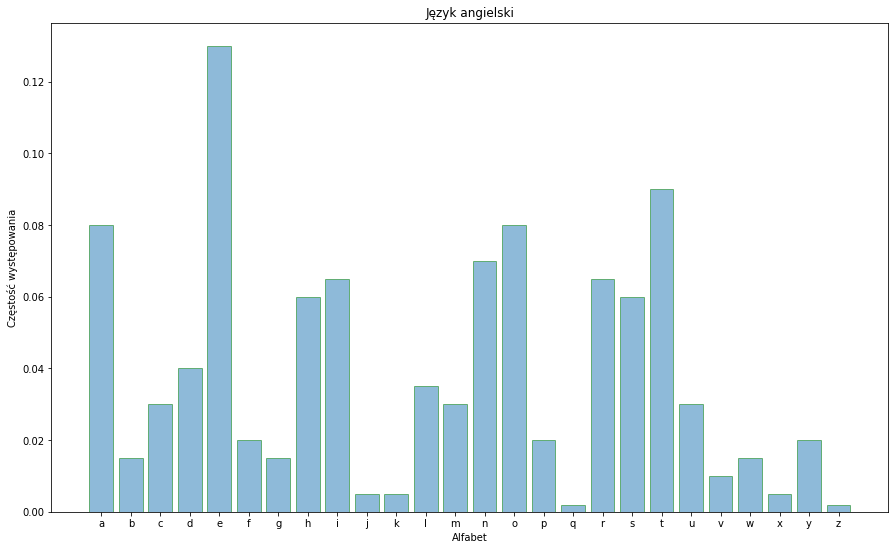

In [10]:
# Graf częstotliwości występowania liter w języku angielskim

# z biblioteki matplotlib importujemy klasę pyplot jako plt
from matplotlib import pyplot as plt
# importujemy bibliotekę numpy as np
import numpy as np

# tablica alfabetu
letters =   ['a',  'b',    'c',   'd',  'e',   'f',   'g',   'h',   'i',   'j',   'k',   'l',    'm',  'n',   'o',   'p',    'q',  'r',   's',   't',   'u',   'v',   'w',   'x',    'y',   'z']
# tablica przechowująca częstotliwość występowania każdej litery
frequency = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 0.030, 0.010, 0.015, 0.005, 0.020, 0.002]
# bierzemy tablicę alfabetu jako nasz opis wartości na osi x
labels = np.arange(len(letters))
# definiujemy rozmiar słupka w grafie
plt.figure(figsize=(15,9))
# podajemy dane dla osi x, osi y, przeźroczystość słupków i kolor ich krawędzi
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
# ustawiamy tytuł osi x
plt.xlabel('Alfabet')
# przypisujemy słupki do wartości na osi x
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
# ustawiamy tytuł wykresu
plt.title("Język angielski");
# ustawiamy tytuł osi y
plt.ylabel('Częstość występowania')
# pokazujemy wykres na ekranie
plt.show()

2. Dokonaj analizy częstości występowania liter w tekście jawnym i szyfrogramie (szyfr Cezara z dowolnym przesunięciem) dla tekstu w poniższym fragmencie kodu. Wyświetl wyniki podobnie jak powyżej. 
3. Dokonaj analizy częstości występowania liter w szyfrogramie wygenerowanym przez "ulepszonego Cezara"

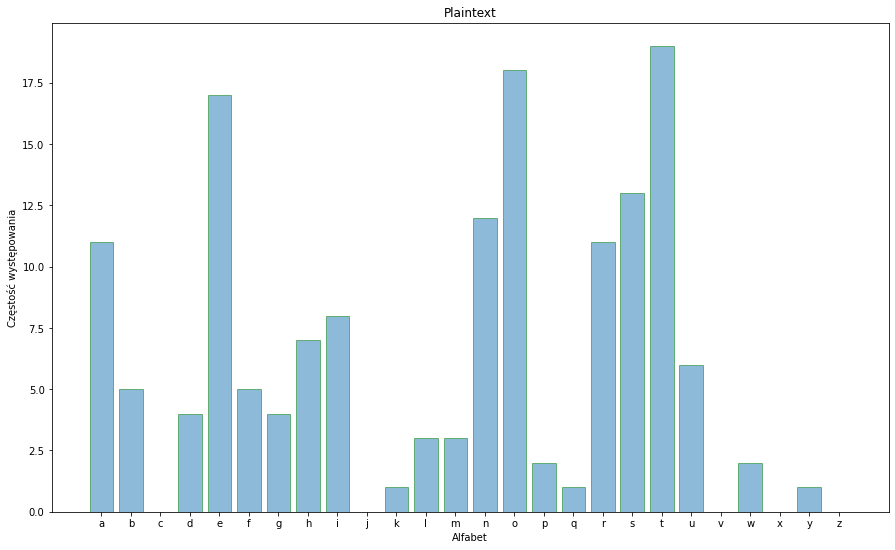

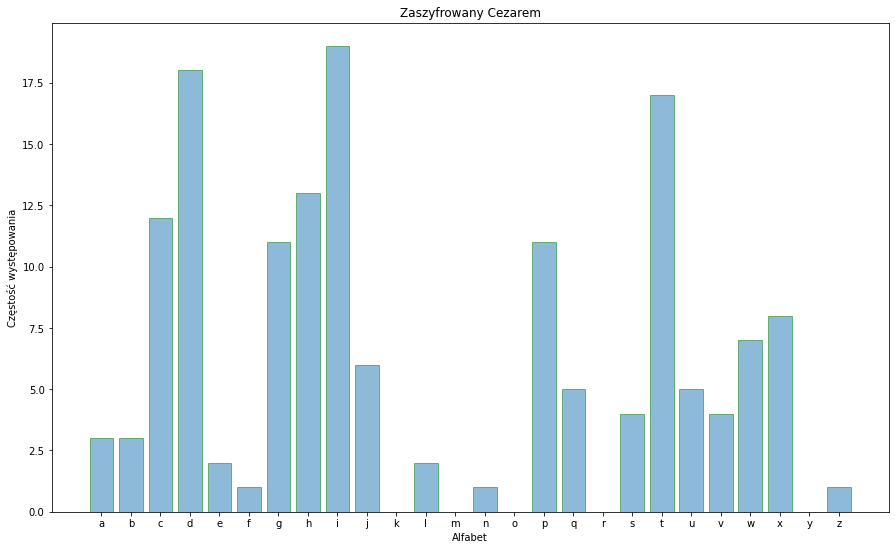

['v', 'a', 'm', 'e', 'f', 'j', 'o', 'w', 'q', 'h', 'i', 'g', 'p', 'u', 'b', 'y', 'c', 't', 'd', 'z', 'l', 'x', 'r', 's', 'n', 'k']


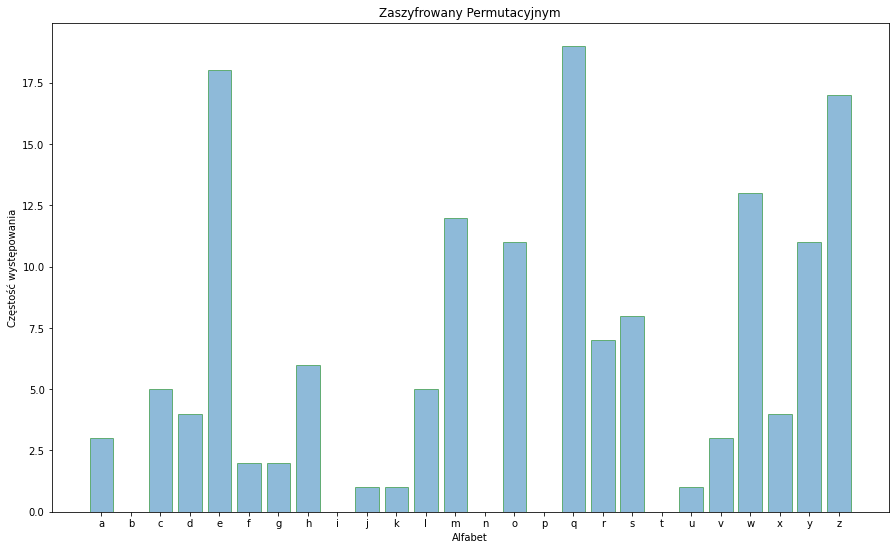

In [1]:
# Porównanie histogramów plaintextu, szyfru cezara, szyfru permutacyjnego

import numpy as np
from collections import Counter as ctr
from matplotlib import pyplot as plt

plaintext = "TobeornottobethatisthequestionWhethertisNoblerinthemindtosufferTheSlingsandArrowsofoutrageousFortuneOrtotakeArmsagainstaSeaoftroublesAndbyopposingendthem"
plaintext = plaintext.lower()

alphabet = [
    'a','b','c','d','e','f','g','h','i','j','k','l','m',
    'n','o','p','q','r','s','t','u','v','w','x','y','z'
]

# policz częstość i wyświetl rozkłady (zwraca tablicę częstości liter jak opisana w poprzednim problemie)
def count_freq(text, alph):
    freq = [0 for i in alph]
    for char in text:
        freq[alph.index(char)]+= 1
    return freq

#############
# PLAINTEXT #
#############

# liczymy częstotliwość występowania liter alfabetu w tekście i rysujemy wykres
frequency = count_freq(plaintext, alphabet)
labels = np.arange(len(alphabet))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Plaintext")
plt.ylabel('Częstość występowania')
plt.show()

#########
# CEZAR #
#########

# szyfrujemy szyfrem cezara jak pokazane wcześniej
ciphertext = ""

key = 15

for text in plaintext.lower().split():
    for char in text:
        ciphertext = ciphertext + alphabet[(alphabet.index(char) + key) % len(alphabet)]

# liczymy częstotliwość występowania liter alfabetu w szyfrogramie i rysujemy wykres
frequency = count_freq(ciphertext, alphabet)
labels = np.arange(len(alphabet))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Zaszyfrowany Cezarem")
plt.ylabel('Częstość występowania')
plt.show()

################
# PERMUTACYJNY #
################

# szyfrujemy szyfrem permutacyjnym jak pokazane wcześniej
tajny = np.random.permutation(alphabet).tolist()

ciphertext = ""

key = 15

for text in plaintext.lower().split():
    for char in text:
        ciphertext = ciphertext + tajny[(alphabet.index(char) + key) % len(alphabet)]

# liczymy częstotliwość występowania liter alfabetu w szyfrogramie i rysujemy wykres
frequency = count_freq(ciphertext, alphabet)
labels = np.arange(len(alphabet))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Zaszyfrowany Permutacyjnym")
plt.ylabel('Częstość występowania')
plt.show()

### Przykład: 
Automatyczna kryptoanaliza tekst zaszyfrowanego zwykłym Cezarem

In [2]:
import nltk
nltk.download('words')
from nltk.corpus import words

# zmienna przechowująca unikalne znaki z szyfru
unique = []
# zmienna przechowująca częstotliwość występowania danego znaku
frequency = []
psi = []
# liczba przechowująca odkryty klucz
key = 0
value = 0.0
exit = True

# wprowadzenie szyfrogramu
ciphertext = "odggd".lower()

#wprowadzenie alfabetu
alphabets = "abcdefghijklmnopqrstuvwxyz"

# tablica częstotliwości liter w alfabecie
english_frequency_prob = [0.080, 0.015, 0.030, 0.040, 0.130, 0.020, 0.015, 0.060, 0.065, 0.005, 
                          0.005, 0.035, 0.030, 0.070, 0.080, 0.020, 0.002, 0.065, 0.060, 0.090, 
                          0.030, 0.010, 0.015, 0.005, 0.020, 0.002]


# dla każdej litery w szyfrogramie
for char in ciphertext: #lista liter w szyfrogramie
    # sprawdzamy czy nie ma jej w liście unikalnych i czy jest alfanumeryczna
    if (char not in unique) and (char.isalpha()):
        unique.append(char)
        
only_alphabets = [char for char in ciphertext if char.isalpha()]  #tylko litery

for unique_char in unique: #częstość liter w tekście 
     frequency.append(ciphertext.count(unique_char) / (float)(len(only_alphabets)))

for i in range(0,26): #oblicz dopasowanie
    for unique_char in unique:
         value = value + frequency[unique.index(unique_char)] * english_frequency_prob[alphabets.index(unique_char) - i]
    psi.append(value)  
    value = 0.0
    
sorted_psi = psi[:] # sortuj dopasowanie
sorted_psi.sort(reverse=True)

decoded_string = ""
for i in range(0, 26):
    key = psi.index(sorted_psi[i])
    decoded_string = ""
    for char in ciphertext:
        if (char != ' '):
            decoded_string = decoded_string + alphabets[alphabets.index(char) - key]
        else:
            decoded_string = decoded_string + " "
            
    print("Próba klucza: ", key, " ....", decoded_string)
    
    for word in decoded_string.split():
        if word not in words.words(): #czy szyfrowanie ma sens
            exit = False
        else:
            exit = True
    if exit:
        break
        
print("\n", "Decoded string: ", decoded_string)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LBK\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Próba klucza:  25  .... pehhe
Próba klucza:  10  .... etwwt
Próba klucza:  2  .... mbeeb
Próba klucza:  15  .... zorro

 Decoded string:  zorro


## Podsumowanie 
Główną słabością szyfrów monoalfabetycznych jest stałość przekształcenia, dzięki czemu możliwe jest łatwe zaobserwowanie regularności.

Rozwiązaniem może być zmiana alfabetów w trakcie szyfrowania. Dla uproszczenia wystarczy zmieniać jedynie porządek liter. 

# Problem
1. Napisać program, który zmienia alfabet szyfrowania po każdej literze.
_Co będzie potrzebne oprócz tekst jawnego?_


Tekst jawny:  To be or not to be that is the question
Whether tis Nobler in the mind to suffer
The Slings and Arrows of outrageous Fortune
Or to take Arms against a Sea of troubles
And by opposing end them
Szyfrogram:  ECOKYVLZHGULIRSOGOCXFPEHKCXGZBJNOXFPFGOCRMMZRXSRRSSZOXHRZGHLPIPEVRYVMLRGNTNEPCCJYYJMFHEGQIMFGSUBXSYSBXDSRLYRGBQQLUNOXWRLGRGYJRCCHHVIQLBQHISNACFOXKCYRGNOQ (uppercase, spacje usunięte)
Odszyfrowana wiadomość:  TOBEORNOTTOBETHATISTHEQUESTIONWHETHERTISNOBLERINTHEMINDTOSUFFERTHESLINGSANDARROWSOFOUTRAGEOUSFORTUNEORTOTAKEARMSAGAINSTASEAOFTROUBLESANDBYOPPOSINGENDTHEM (uppercase, spacje usunięte)


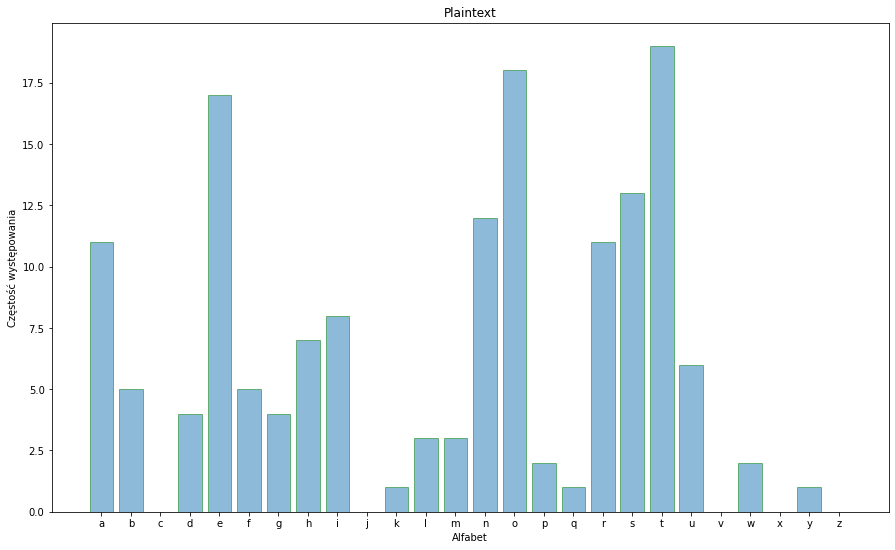

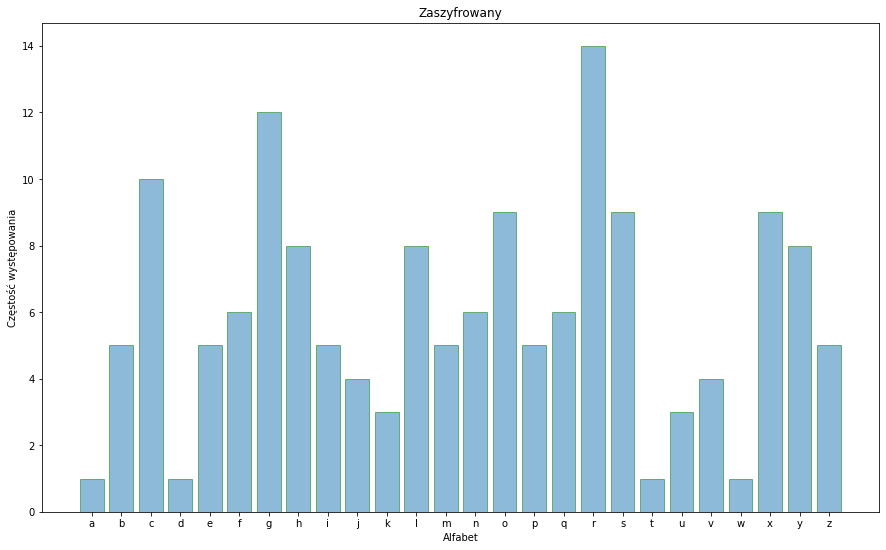

In [1]:
# Szyfr Vigenere'a

import numpy as np
from matplotlib import pyplot as plt

alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ".upper()

# nasz tekst do zaszyfrowania
plaintext = '''To be or not to be that is the question
Whether tis Nobler in the mind to suffer
The Slings and Arrows of outrageous Fortune
Or to take Arms against a Sea of troubles
And by opposing end them'''

# zmienna przechowująca nasz klucz
keytext = "LONGKEY"

# zmienna przechowująca nasz szyfrogram
ciphertext = ""

print("Tekst jawny: ", plaintext)


ctr = 0
for text in plaintext.upper().split():
    for char in text:
        key = alphabet.index(keytext[ctr])
        ciphertext = ciphertext + alphabet[(alphabet.index(char) + key) % len(alphabet)]
        ctr = (ctr + 1) % len(keytext)
print("Szyfrogram: ",  ciphertext, "(uppercase, spacje usunięte)")

decodedtext = ""
ctr = 0
for text in ciphertext:
    for char in text:
        key = alphabet.index(keytext[ctr])
        decodedtext = decodedtext + alphabet[(alphabet.index(char) - key) % len(alphabet)]
        ctr = (ctr + 1) % len(keytext)
print("Odszyfrowana wiadomość: ",  decodedtext,  "(uppercase, spacje usunięte)")

def count_freq(text, alph):
    freq = [0 for i in alph]
    for char in text:
        freq[alph.index(char)]+= 1
    return freq


frequency = count_freq(decodedtext, alphabet)
labels = np.arange(len(alphabet))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Plaintext")
plt.ylabel('Częstość występowania')
plt.show()


frequency = count_freq(ciphertext, alphabet)
labels = np.arange(len(alphabet))
plt.figure(figsize=(15,9))
plt.bar(labels, frequency, alpha=0.5, edgecolor="green")
plt.xlabel('Alfabet')
plt.xticks(np.arange(26), ('a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))
plt.title("Zaszyfrowany")
plt.ylabel('Częstość występowania')
plt.show()

### Zastanów się:
1. Sprawdź jak wygląda histogram szyfrogrami. 
2. Zastanów się jakie znaczenia ma długość klucza dla bezpieczeństwa szyfrowania.
3. Czy powtarzanie klucza można wykorzystać dla potrzeb kryptoanalizy? 
4. Jaki klucz gwarantowałby bezpieczeństwo?
5. Jaki rozkład częstości symboli szyfrogramu nie ujawni żadnych przydatnych danych kryptoanalitykowi? 

### Szyfr polialfabetyczny 
_Szyfr używający wielu alfabetów szyfrowych. W trakcie szyfrowania te same litery w tekście jawnym_

### Szyfr doskonały (według Clouda Shannona):
1. Jakie warunki musi spełniać szyfr-nie-do-złamania? 

## Zadanie (dodatkowe, na ocenę)
1. Napisz notebook jupyter, które implementuje klasyczne szyfry mechaniczne: Enigma, szyfr Playfair, szyfr maszyny Lorenza. W sieci można łatwo znaleźć gotowe kody, wiec przy ocenie zwracam uwagę no dokładne omówienie kodu, przejrzystość, komentarze etc. 